In [1]:
from Adversary import Problem, Adversary
import numpy as np
import scipy
from Examples import threshold_k
from Solvers import adv_solver, space_adv_prob, real_adv_solver
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] =150

In [2]:
n = 5
k = 2
prob = threshold_k(n, k)
# print(prob)
# opt_prob = space_adv_prob(prob)
# vals = []
# mats = []
# opt_prob.param_dict['r'].value  = 212
# r = opt_prob.param_dict['r']

# print(r)
# opt_prob.solve()
# val = opt_prob.value
# adv= real_adv_solver(prob)

In [3]:
print(set(np.round(B.flatten(), 4)))
print(set(np.round(adv.matrix.flatten(), 9)))
print(prob.yes_len, prob.no_len)
plt.imshow(np.array([B]).T)
plt.colorbar()
plt.show()

adv.visualize_matrix()

NameError: name 'B' is not defined

3.8729833315859588
[0.17215350366179116, 0.17215350366179027, 0.17215350366179055, 0.1721535036617528, 0.17215350366179258, 0.17215350366177723, 0.17215350366174165]
{0.172, -0.0}
['0000011', '0000101', '0000110', '0001001', '0001010', '0001100', '0010001', '0010010', '0010100', '0011000', '0100001', '0100010', '0100100', '0101000', '0110000', '1000001', '1000010', '1000100', '1001000', '1010000', '1100000']
['0000111', '0001011', '0001101', '0001110', '0010011', '0010101', '0010110', '0011001', '0011010', '0011100', '0100011', '0100101', '0100110', '0101001', '0101010', '0101100', '0110001', '0110010', '0110100', '0111000', '1000011', '1000101', '1000110', '1001001', '1001010', '1001100', '1010001', '1010010', '1010100', '1011000', '1100001', '1100010', '1100100', '1101000', '1110000']
(35, 21)


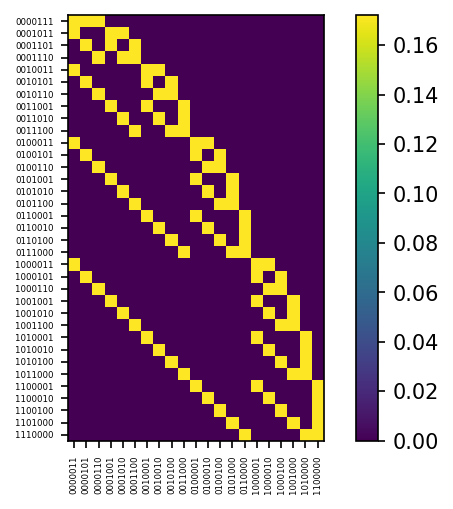

[[ 1.72153503e-01  1.72153503e-01  1.72153503e-01 -1.57769788e-10
  -1.57769783e-10 -1.57769774e-10 -1.57769777e-10 -1.57769789e-10
  -1.57769787e-10  2.96800448e-10 -1.57769793e-10 -1.57769785e-10
  -1.57769782e-10  2.96800441e-10  2.96800462e-10 -1.57769783e-10
  -1.57769788e-10 -1.57769775e-10  2.96800452e-10  2.96800464e-10
   2.96800465e-10]
 [ 1.72153503e-01 -1.57769780e-10 -1.57769788e-10  1.72153503e-01
   1.72153503e-01 -1.57769783e-10 -1.57769781e-10 -1.57769785e-10
   2.96800458e-10 -1.57769774e-10 -1.57769786e-10 -1.57769793e-10
   2.96800452e-10 -1.57769777e-10  2.96800458e-10 -1.57769784e-10
  -1.57769790e-10  2.96800460e-10 -1.57769778e-10  2.96800462e-10
   2.96800449e-10]
 [-1.57769787e-10  1.72153503e-01 -1.57769797e-10  1.72153503e-01
  -1.57769786e-10  1.72153503e-01 -1.57769786e-10  2.96800465e-10
  -1.57769790e-10 -1.57769780e-10 -1.57769793e-10  2.96800462e-10
  -1.57769796e-10 -1.57769792e-10  2.96800457e-10 -1.57769789e-10
   2.96800466e-10 -1.57769779e-10 -1.5

In [50]:
print(adv.norm()/adv.partial_norm(0))
print(list(adv.partial_norm(i) for i in range(n)))
print(set(np.round(adv.matrix.flatten(), 3)))
adv.visualize_matrix()
print(adv.matrix)

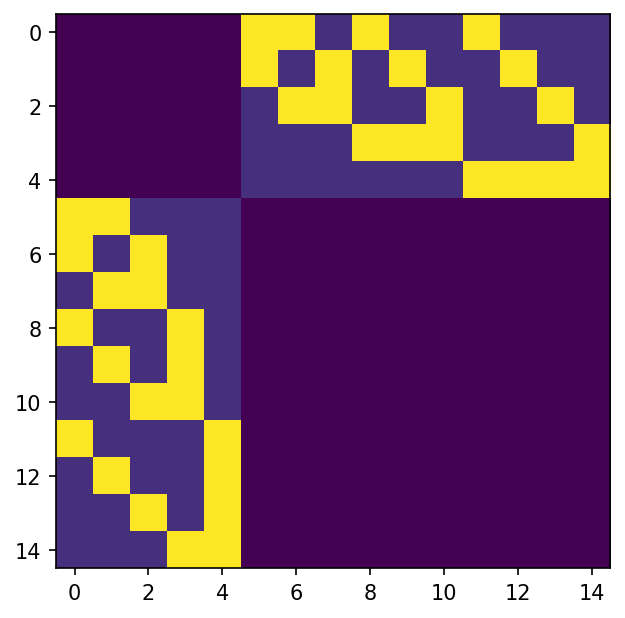

[-4.35966526e+00+0.00000000e+00j  4.35966526e+00+0.00000000e+00j
  1.89736660e+00+0.00000000e+00j  1.89736660e+00+0.00000000e+00j
  1.89736660e+00+0.00000000e+00j  1.89736660e+00+0.00000000e+00j
 -1.89736660e+00+0.00000000e+00j -1.89736660e+00+0.00000000e+00j
 -1.89736660e+00+0.00000000e+00j -1.89736660e+00+0.00000000e+00j
  1.69736785e-17+1.08745040e-16j  1.69736785e-17-1.08745040e-16j
  9.09005189e-17+0.00000000e+00j -1.07970956e-17+1.90735704e-17j
 -1.07970956e-17-1.90735704e-17j]
(4.359665258434264+0j)
[-0.31622777 -0.31622777 -0.31622777 -0.31622777 -0.31622777 -0.2236068
 -0.2236068  -0.2236068  -0.2236068  -0.2236068  -0.2236068  -0.2236068
 -0.2236068  -0.2236068  -0.2236068 ]
-0.316227766016972 -0.2236067977492497 0.7071067811839417


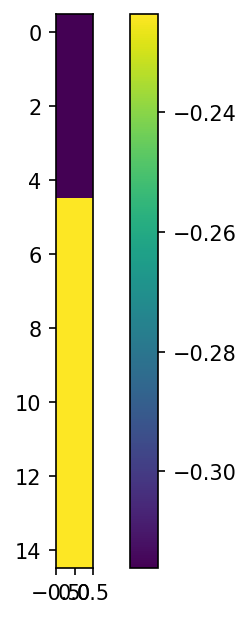

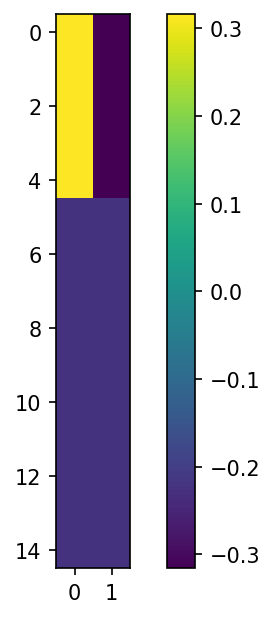

4.3596652584342666


In [63]:
full = np.block([
    [np.zeros((prob.no_len, prob.no_len)), adv.matrix.T],
    [adv.matrix, np.zeros((prob.yes_len, prob.yes_len))]
])
plt.imshow(full)
plt.show()
vals, vects = np.linalg.eig(full)
print(vals)
best_vect = vects[:, np.argmax(vals)].real
print(np.max(vals))
print(best_vect)
print(np.min(best_vect), np.max(best_vect), np.max(best_vect)/np.min(best_vect))
plt.imshow(np.array([best_vect]).T)
plt.colorbar() 
plt.show()
plt.imshow(vects[:, :2].real)
plt.colorbar()
plt.show()
print(np.linalg.norm(full, 2))

In [33]:
app =  full @ best_vect.T
print(best_vect)
print(np.max(best_vect)/np.min(best_vect), np.max(app)/np.min(app))


[0.31622777 0.31622777 0.31622777 0.31622777 0.31622777 0.2236068
 0.2236068  0.2236068  0.2236068  0.2236068  0.2236068  0.2236068
 0.2236068  0.2236068  0.2236068 ]
1.4142135667105027 1.4142135667105038


[[1.  0.5 0.5 0.5 0.5 0.5]
 [0.5 1.  0.5 1.  0.5 1. ]
 [0.5 0.5 1.  0.5 1.  1. ]
 [0.5 1.  0.5 1.  0.5 1. ]
 [0.5 0.5 1.  0.5 1.  1. ]
 [0.5 1.  1.  1.  1.  1. ]]
[[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]
